# 1

In [ ]:
import pandas as pd
import numpy as np


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("BRCA_pam50 (1).tsv", sep = "\t", index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.2, random_state=17
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5, weights="distance", p=1))
])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8633879781420765


# 2

In [ ]:
a = {i: 0 for i in np.unique(y_test)}
for i, j in zip(y_pred, y_test):
  if i == j:
    a[i] += 1
a = {i: round(a[i]/list(y_test).count(i), 3) for i in a}
print(a)

{'HER2-enriched': 0.769, 'Healthy': 1.0, 'Luminal A': 0.963, 'Luminal B': 0.595, 'Normal-like': 0.0, 'Triple-negative': 1.0}


# 3

In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
df = pd.read_csv("BRCA_pam50 (1).tsv", sep = "\t", index_col=0)
X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.2, random_state=17
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", NearestCentroid())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8633879781420765


In [ ]:
a = {i: 0 for i in np.unique(y_test)}
for i, j in zip(y_pred, y_test):
  if i == j:
    a[i] += 1
a = {i: round(a[i]/list(y_test).count(i), 3) for i in a}
print(a)

{'HER2-enriched': 1.0, 'Healthy': 0.9, 'Luminal A': 0.817, 'Luminal B': 0.838, 'Normal-like': 0.5, 'Triple-negative': 1.0}


# 4

In [ ]:
from scipy.stats import *
import pandas as pd
import seaborn as sns
import numpy as np

координаты ближайших точек и новой точки:
blue: (-0.387, -1.194)
new: (0.408, -0.035)
green: (-0.883, 0.142)


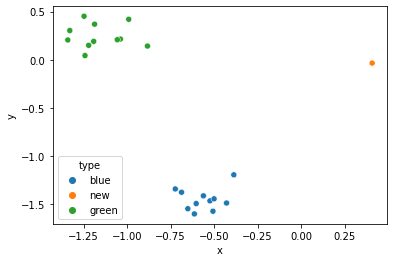

In [ ]:
mark = ['blue', 'new', 'green']

N = int(1e3)
for i in range(N):
  x = norm(0, 1).rvs(3)
  y = norm(0, 1).rvs(3)
  eq1 = abs(x[0] - x[1]) + abs(y[0] - y[1]) < abs(x[2] - x[1]) + abs(x[2] - x[1])
  eq2 = (x[0] - x[1])**2 + (y[0] - y[1])**2 > (x[2] - x[1])**2 + (y[2] - y[1])**2
  if eq1 and eq2:
    print('координаты ближайших точек и новой точки:')
    for i in range(3):
      print(f'{mark[i]}: ({round(x[i], 3)}, {round(y[i], 3)})')
    break

x_blue = norm((5*x[0] - x[1] ) / 4, 0.1).rvs(10)
y_blue = norm( (5*y[0] - y[1]) / 4, 0.1).rvs(10)

x_green = norm( (5*x[2] - x[1] ) / 4, 0.1).rvs(10)
y_green = norm( (5*y[2] - y[1]) / 4, 0.1).rvs(10)

mark = mark + ['blue']*10 + ['green']*10
x = list(x) + list(x_blue) + list(x_green)
y = list(y) + list(y_blue) + list(y_green)

df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['type'] = mark
sns.scatterplot(x = 'x', y = 'y', hue = 'type', data = df)

# 5

\begin{equation*}
C_1 > \sqrt{2} \\
\sqrt{2} > C_2 \\
C_3 > \sqrt{2} \\
C_5 > 2 \\
C_6 < 2
\end{equation*}

In [ ]:
N = int(1e3)

x = norm(0, 1).rvs(N)
y = norm(0, 1).rvs(N)

C1 = 2**0.5

go = True
for i in range(N):
  if go:
    for j in range(N):
      if abs(x[i] - x[j]) + abs(y[i] - y[j]) < C1*((x[i] - x[j])**2 + (y[i] - y[j])**2)**0.5:
        go = False
        break

if go:
  print('коэффициент не подходит')
else:
  print(f'все ок, значение коэффициента C = {C1} подходит')

все ок, значение коэффициента C = 1.4142135623730951 подходит
